# Check for Out-of Vocabulary Words

In [1]:
import gensim.downloader as api

# Download and Load the pre-trained model
model = api.load('word2vec-google-news-300') 

In [2]:
import json
import re

train_data = json.load(open('NER_train_data_v2.json', 'r'))
val_data = json.load(open('NER_val_data_v2.json', 'r'))
test_data = json.load(open('NER_test_data_v2.json', 'r'))

total_tokens = []
out_of_vocab = []
in_vocab = []
token_with_labels = []

for index, data in test_data.items():
    text = data['text']
    labels = data['labels']
    pattern = r'[ ]+'
    tokens = re.split(pattern, text)
    for i, token in enumerate(tokens):
        total_tokens.append(token)
        try:
            model[token]
            in_vocab.append(token)
        except:
            out_of_vocab.append(token)
            if labels[i] != 'O':
                token_with_labels.append(token)
                # print(token, labels[i])
                pass

print('Total tokens:', len(total_tokens))
print('Out of vocabulary tokens:', len(out_of_vocab))
print('In vocabulary tokens:', len(in_vocab))
print('Token with labels:', len(token_with_labels))
print('Unique tokens:', len(set(total_tokens)))
print('Unique out of vocabulary tokens:', len(set(out_of_vocab)))
print('Unique in vocabulary tokens:', len(set(in_vocab)))
print('Unique token with labels:', len(set(token_with_labels)))
print('Out of vocabulary Labelled tokens:')
print(set(token_with_labels))

Total tokens: 33351
Out of vocabulary tokens: 8983
In vocabulary tokens: 24368
Token with labels: 2596
Unique tokens: 8258
Unique out of vocabulary tokens: 3618
Unique in vocabulary tokens: 4640
Unique token with labels: 1598
Out of vocabulary Labelled tokens:
{'Jagadindra', '19670/07,', 'Adhoya', 'O.S.No.123', 'Meera,', '2022', '581.', 'Parliament.', '354,', 'Dausa,', '524/2021)', 'E.L.T.', 'Singhvi,', '1872', '(2015)', '1958.', '22.01.2003', 'No.2502', '04/09/2020', 'Hyderabad-02', 'No.567', '2011', 'Murthy,', '(CPC)', 'Rajaseekaran', 'C/FA/3351/2017', '[1991', 'Janakiammal', 'Sitapur,', '2(24)(x)', '14.2.2019', '119)', 'E.A.No.780', 'India1.', 'Pathak.', 'Delhi);', 'M.A.C.M.A.No.685', '142', 'Tribunal,', 'Prl.', '22.02.2007,', 'and', '(since', '46', '(Regulation', '[Mithu', '25,', '[AIR', 'Chennai/third', 'Kant,', '13(3A)', '29/12/2004', '215.The', 'NO.86/2019', 'Manjunath,', 'O.P.(C)No.446', '1962', 'mills,', '13A,', 'Nagavara,', '482', '45/54', 'Chellakere,', '13.03.2008.', 'Mehta

In [9]:
class_to_idx = {'O': 0, 'B_CASE_NUMBER': 1, 'I_CASE_NUMBER': 2, 'B_ORG': 3, 'I_ORG': 4, 'B_OTHER_PERSON': 5, 'I_OTHER_PERSON': 6, 'B_STATUTE': 7, 'I_STATUTE': 8, 'B_PROVISION': 9, 'I_PROVISION': 10, 'B_COURT': 11, 'I_COURT': 12, 'B_WITNESS': 13, 'B_PRECEDENT': 14, 'I_PRECEDENT': 15, 'B_DATE': 16, 'B_PETITIONER': 17, 'I_PETITIONER': 18, 'I_WITNESS': 19, 'B_GPE': 20, 'B_RESPONDENT': 21, 'I_RESPONDENT': 22, 'I_DATE': 23, 'B_JUDGE': 24, 'I_JUDGE': 25, 'I_GPE': 26}
classes = list(class_to_idx.keys())

for index, data in test_data.items():
    text = data['text']
    labels = data['labels']
    pattern = r'[ ]+'
    tokens = re.split(pattern, text)
    for i, token in enumerate(tokens):
        total_tokens.append(token)
        if token not in model and labels[i] in classes:
            classes.remove(labels[i])
print('Embeddings not found for:', classes)
print('Total classes:', len(classes))

Embeddings not found for: []
Total classes: 0


{'O': 0, 'B_CASE_NUMBER': 1, 'I_CASE_NUMBER': 2, 'B_ORG': 3, 'I_ORG': 4, 'B_OTHER_PERSON': 5, 'I_OTHER_PERSON': 6, 'B_STATUTE': 7, 'I_STATUTE': 8, 'B_PROVISION': 9, 'I_PROVISION': 10, 'B_COURT': 11, 'I_COURT': 12, 'B_WITNESS': 13, 'B_PRECEDENT': 14, 'I_PRECEDENT': 15, 'B_DATE': 16, 'B_PETITIONER': 17, 'I_PETITIONER': 18, 'I_WITNESS': 19, 'B_GPE': 20, 'B_RESPONDENT': 21, 'I_RESPONDENT': 22, 'I_DATE': 23, 'B_JUDGE': 24, 'I_JUDGE': 25, 'I_GPE': 26}


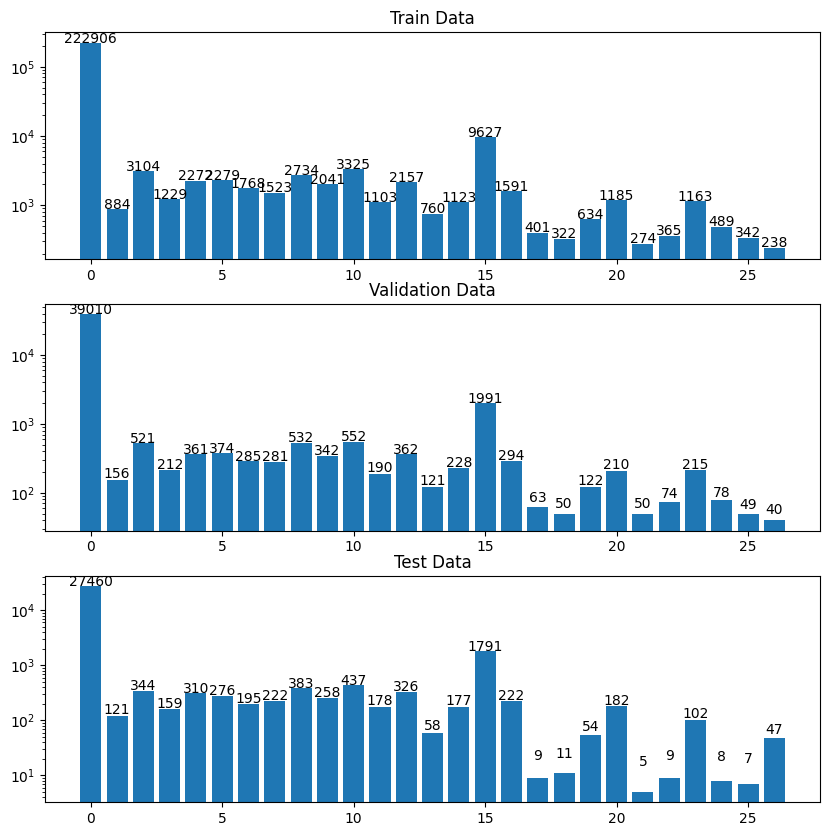

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class_to_idx = {}
for index, data in train_data.items():
    labels = data['labels']
    for label in labels:
        if label not in class_to_idx:
            class_to_idx[label] = len(class_to_idx)
print(class_to_idx)
            
all_labels_train = []
for index, data in train_data.items():
    labels = data['labels']
    all_labels_train.extend([class_to_idx[label] for label in labels])
            
all_labels_val = []
for index, data in val_data.items():
    labels = data['labels']
    all_labels_val.extend([class_to_idx[label] for label in labels])

all_labels_test = []
for index, data in test_data.items():
    labels = data['labels']
    all_labels_test.extend([class_to_idx[label] for label in labels])


unique_label_train, counts_label_train = np.unique(all_labels_train, return_counts=True)
unique_label_val, counts_label_val = np.unique(all_labels_val, return_counts=True)
unique_label_test, counts_label_test = np.unique(all_labels_test, return_counts=True)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].bar(unique_label_train, counts_label_train)
ax[0].set_title('Train Data')
ax[0].set_yscale('log')
for i, v in enumerate(counts_label_train):
    ax[0].text(i, v + 10, str(v), ha='center')
ax[1].bar(unique_label_val, counts_label_val)
ax[1].set_title('Validation Data')
ax[1].set_yscale('log')
for i, v in enumerate(counts_label_val):
    ax[1].text(i, v + 10, str(v), ha='center')
ax[2].bar(unique_label_test, counts_label_test)
ax[2].set_title('Test Data')
ax[2].set_yscale('log')
for i, v in enumerate(counts_label_test):
    ax[2].text(i, v + 10, str(v), ha='center')
plt.show()

# Word2Vector Embeddings

In [2]:
import gensim   
import gensim.downloader as api

model = api.load('word2vec-google-news-300') 

In [5]:
# print(list(api.info()['models'].keys()))
# print(len(model['world']), model['world'])
# print(model.most_similar('laugh', topn=5))
# print(model['wfbow'])
print(model.similarity('laugh', 'laughing'))

0.7357167


# FastText Embeddings


In [6]:
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

In [7]:
print(fasttext_model.similarity('laugh', 'laughing'))

0.74053586


# GloVe Embeddings

In [8]:
glove_model = api.load('glove-wiki-gigaword-300')

In [9]:
print(glove_model.similarity('laugh', 'laughing'))

0.65835667
